<a href="https://colab.research.google.com/github/jsp289/CS5901_Assignment2/blob/main/CS5901__assignment2_stage2_time_space_complexity_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CS5901 - Assignment 2 - Stage 2**
*This .py file provides functions to calculate the time and space complexity for:*

1.   Standard Matrix Multiplication
2.   Unordered List of Integers
3.   Substring Find() Method vs. Loop italicized text

---









### **Stage 2.1** - Standard Matrix Multiplication Space-Time Complexity
*Here we multiply a random integer matrix by a random float matrix of increasing size and compare their time and space complexities using a scatter plot.*

In [15]:
#Import all libraries required for space-time complexity analysis
import numpy as np
import matplotlib.pyplot as plt
import time
import gc
import psutil
import os
import sys
import string
import random

def matrix_multiplication(size):
  """
  This function identifies multiplies 2 square matrices and computes space and time required to compute.

  Args:
    size (int): size of the square matrix
  Returns:
    run_time (float): time required to compute
    mem_usage (float): space required to compute
  """
  #Initiate random integer matrices
  A = np.random.randint(1, 50000, size=(size, size))
  B = np.random.randint(1, 50000, size=(size, size))

  # Initiate space & time baselines
  start_time = time.time()
  process = psutil.Process(os.getpid())
  base_mem = process.memory_info().rss

  # Matrix multiplication
  final_mat = np.dot(A, B)

  #Compute running time and memory usage
  end_time = time.time()
  mem_usage = process.memory_info().rss - base_mem
  run_time = end_time - start_time

  return run_time, mem_usage
print(matrix_multiplication(400))

(0.09253406524658203, 1081344)


### **Stage 2.2** - Ordering Integers
*Here we have a matrix of unordered integers, we flatten it, sort the elements from smallest to largest, and compute the space and time complexity of the sorting process*

In [16]:
def inneficient_integer_sort(size):
  """
  This function generates a random matrix of integers, stores it in a list, and sorts them in ascending order.

  Args:
    size (int): size of the square matrix
  Returns:
    run_time (float): time required to compute
    mem_usage (float): space required to compute
  """
  #Generate random matrix and store in list
  lst_rand_ints = np.random.randint(1,50000,size).tolist()
  start = time.time()
  process = psutil.Process(os.getpid())
  base_mem = process.memory_info().rss

  #Inneficient sort
  sorted_lst_rand_ints = []
  while lst_rand_ints:
    min = lst_rand_ints[0]
    for rand_int in lst_rand_ints:
      if rand_int < min:
        min = rand_int
    sorted_lst_rand_ints.append(min)
    lst_rand_ints.remove(min)

  #Compute space and time complexity of inneficient sort
  end = time.time()
  mem_usage = process.memory_info().rss - base_mem
  run_time = end - start

  return run_time, mem_usage
print(inneficient_integer_sort(5000))

(0.36061525344848633, 0)


### **Stage 2.3** - String Find Method vs Manual Method
*Here we generate a random string and compare the space-time complexity of manual sort vs the string.find() method*

In [17]:
def string_search_comparison(text,char):
  """
  This function compares time of manual string search vs the string.find() method

  Args:
    text (str): a random string
    char (str): a random character or substring
  Returns:
    str_find_time (float): time required to compute string.find() method
    manual_find_time (float): time required to compute manual search

  """
  # Str.find() time
  start_find = time.time()
  find_result = text.find(char)
  end_find = time.time()
  str_find_time = end_find - start_find

  # Manual search time (the loop breaks when it finds the substring)
  start_manual = time.time()
  manual_count = -1
  for i in range(len(text)-len(char)+1):
    if text[i:i + len(char)] == char:
      manual_count =1
      break
  end_manual = time.time()
  manual_find_time = end_manual - start_manual

  return str_find_time, manual_find_time


text = "a" * 10000 + "b" + "ab" * 10000
char = "ab"
find_t, manual_t = string_search_comparison(text, char)
print(f"String.find() method time: {find_t}")
print(f"Manual search time: {manual_t}")





String.find() method time: 1.4066696166992188e-05
Manual search time: 0.0013828277587890625


### **Stage 2.4** - Summary Analysis
*Here we analyze the space-time complexity for all algorithms implemented for stages 2.1 to 2.3*


Complexity Analysis Results:

matrix_mult:
  time: [0.001956939697265625, 0.17147326469421387, 1.5165514945983887]
  space: [0, 1884160, 7892992]

integer_sort:
  time: [0.00028705596923828125, 0.003908634185791016, 0.01636672019958496]
  space: [0, 0, 0]

string_search:
  time: [1.2636184692382812e-05, 0.0014050006866455078]

Sizes Tested: [100, 500, 1000]


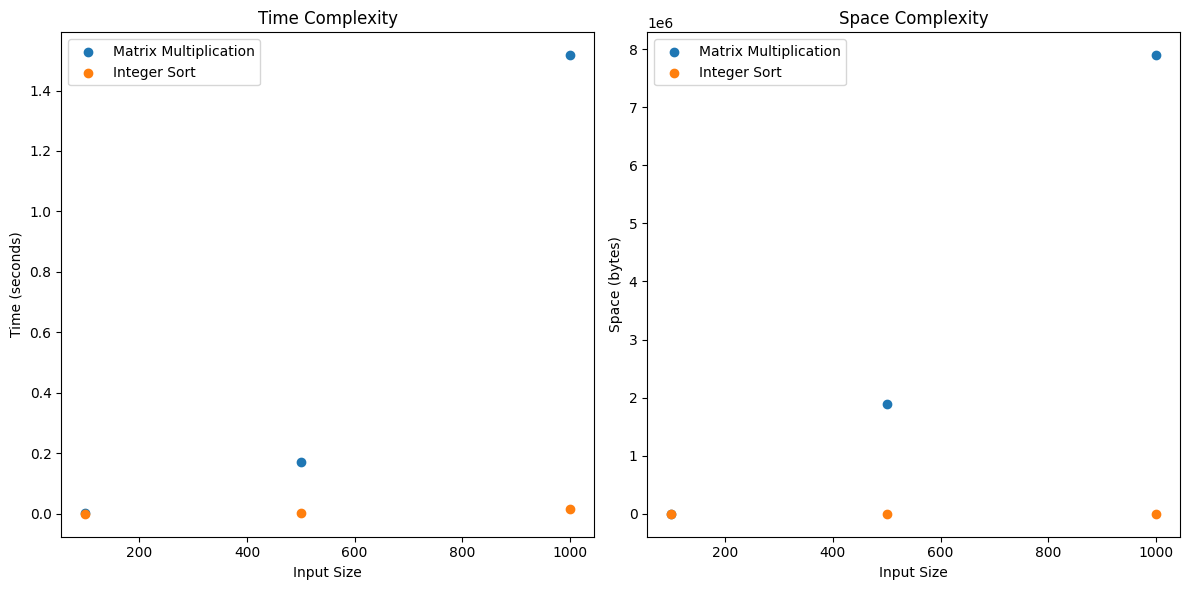

In [23]:
import matplotlib.pyplot as plt

def complexity_analysis(sizes=[100,500,1000]):
  """
  This function compares time of manual string search vs the string.find() method

  Args:
    sizes (lst): a list of input sizes for testing

  Returns:
    tuple (results_dict, sizes_tested)

  """
  #Initiate dictionary to store test results

  results = {'matrix_mult':{'time':[],'space':[]},
             'integer_sort':{'time':[],'space':[]}}

  for size in sizes:
    #clear memory before each test
    gc.collect()

    #test for matrix multiplixation
    t,s = matrix_multiplication(size)
    results['matrix_mult']['time'].append(t)
    results['matrix_mult']['space'].append(s)

    #test for inneficient integer sort
    t,s = inneficient_integer_sort(size)
    results['integer_sort']['time'].append(t)
    results['integer_sort']['space'].append(s)

  #test for string search
  text = "a" * 10000 + "b" + "ab" * 10000
  char = "ab"
  str_find_time, manual_find_time = string_search_comparison(text, char)
  results['string_search'] = {'time':[str_find_time, manual_find_time]}

  return results, sizes

# Call and print results
results, sizes = complexity_analysis(sizes=[100, 500, 1000])
print("\nComplexity Analysis Results:")
for algorithm, data in results.items():
    print(f"\n{algorithm}:")
    for metric, values in data.items():
        print(f"  {metric}: {values}")
print("\nSizes Tested:", sizes)

# Create scatter plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Time Complexity Plot
ax1.scatter(sizes, results['matrix_mult']['time'], label='Matrix Multiplication')
ax1.scatter(sizes, results['integer_sort']['time'], label='Integer Sort')
ax1.set_xlabel('Input Size')
ax1.set_ylabel('Time (seconds)')
ax1.set_title('Time Complexity')
ax1.legend()

# Space Complexity Plot
ax2.scatter(sizes, results['matrix_mult']['space'], label='Matrix Multiplication')
ax2.scatter(sizes, results['integer_sort']['space'], label='Integer Sort')
ax2.set_xlabel('Input Size')
ax2.set_ylabel('Space (bytes)')
ax2.set_title('Space Complexity')
ax2.legend()

plt.tight_layout()
plt.show()

